# Introduction #

In this project, we looked to find the best neighborhood in Pittsburgh using three datasets from the Western Pennsylvania Regional Data Center. The three datasets we chose were education and income, public safety, and built environment conditions. We felt that these three datasets provided a fairly diverse and comprehensive overview of the most important aspects of a neighborhood. Education and income was chosen because higher education and income levels tend to correlate with reduced crime increased educational opportunities for those in the neighborhood. Public safety was chosen as a fairly obvious measure, as almost everyone in a neighborhood wants to feel safe from crime. Finally, built environment conditions was chosen because it is a good indicator of how well a neighborhood is being kept and how safe and up to date most buildings in a neighborhood are.

Our approach to finding the best neighborhood differed among each of our individual notebooks: 
* Education and Income Notebook: "Any type of college degree" was chosen as the overall metric. Since a college education can lead to higher income and more opportunities, the proportion of neighbhorhood residents with a college degree was used to determine the best neighborhoods. Using this metric, a top ten list was generated.
* Public Safety Notebook: For this dataset, both "number of major crime reports" and "crime per 100 people" were analyzed. However, "crime per 100 people" was used as the final metric to compute the top ten neighborhood list. Similar to our education and income notebook, the metric used was a proportion. Since different neighborhoods have different populations, proportions seemed to be the fairest way to analyze a neighborhood. Using this "crime per 100 people" metric, a top ten list was generated
* Built Environment Conditions Notebook: In this notebook, 3 sub metrics were used to compute one overall final score. The three submetrics were "buildings in good condition", "buildings in poor condition", and "condemend buildings". Following the theme of the other two notebooks, these metrics were proportions. Then, using a weighted average, where the weights were 35%, 30%, and 35%, respectively, a final score (out of 1) was generated for each neighborhood. Then, a top ten list based on this final score was generated.
* Final Approach: Once each of our notebooks had a top ten list generated, our idea to find the best overall neighborhood was to find the neighborhood that appeared on all three lists with the combined lowest numbering. For example, if a neighborhood ranked first in notebook 1, third in notebook 2, and fourth in notebook 3, then its score would be 8. when analyzing the top ten lists, only one neighborhood (Squirrel Hill North) appeared on all three lists, so this was quite easy to figure out.




# The Metric # 

Our overall metric was the lowest combined numbering for neighborhoods that appeared on all three of our individual top ten lists. For our education and income dataset, the metric used was the proportion of residents with any type of college degree. For our public safety dataset, our metric was crime per 100 residents. Finally, for our built environment condiditions notebook, the proportion of buildings in good conditions, poor condition, and condemned condition was used.

All of our metrics were based on proportions, as we felt this was the fairest way to evaluate neighborhoods with different populations. Much of our analysis focused on overall safety, whether our metrics were directly related to safety (ex. crime per 100 people) or a proxy for safety (ex. education level and building conditions). Since safety is next to food and water as a basic need for people, we felt that it would be a solid measure of how "good" a neighborhood is.

# The Best Neighborhood #

Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.

In [53]:
# Importing the necessary modules for our data analysis
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Dataset 1 - Education and Income #

<Axes: xlabel='Neighborhood'>

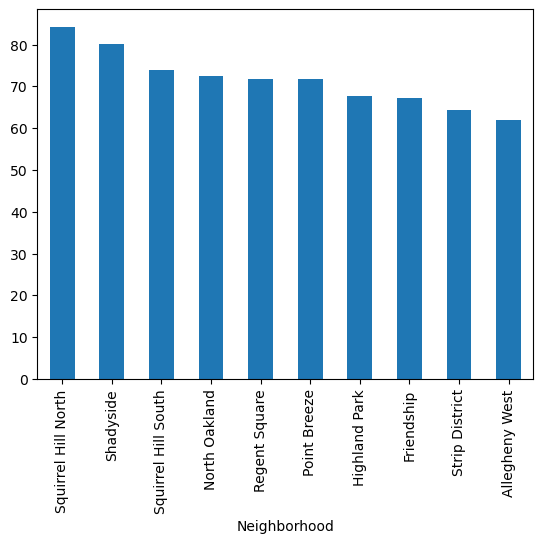

In [55]:
df = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/f7b19c6c-aa66-419b-b0e1-9998d7ddfcbc/download/education-income.csv")
df.set_index('Neighborhood', inplace = True)
bachelors = df["Edu. Attainment: Bachelor's Degree (2010)"].str.rstrip('%').astype('float')
assoc = df["Edu. Attainment: Assoc./Prof. Degree (2010)"].str.rstrip('%').astype('float')
postgrad = df["Edu. Attainment: Postgraduate Degree (2010)"].str.rstrip('%').astype('float')
total_college = bachelors + assoc + postgrad
sorted_df = total_college.sort_values(ascending=False)
sorted_df.head(10).plot(kind='bar')

Here is our analysis of our first dataset - education and income. Using any type of college degree as the overall metric, here is the top ten list of neighborhoods plotted in a bar graph.

# Dataset 2 - Public Safety #

      Neighborhood  #Part 1 (Major Crime) Reports (2010)
31       Fairywood                                     3
54   New Homestead                                     7
20  Chartiers City                                     9
26   East Carnegie                                     9
35      Glen Hazel                                    10
53      Mt. Oliver                                    12
80     Summer Hill                                    13
58         Oakwood                                    14
77       St. Clair                                    14
66       Ridgemont                                    14


<Axes: title={'center': ' Neighborhood vs Major Crime Reports'}, xlabel='Neighborhood'>

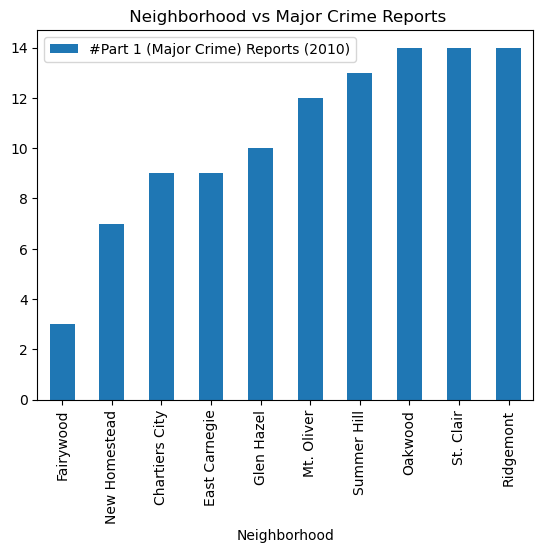

In [58]:
df = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0/download/public-safety.csv")
sorted_df = df.sort_values(by= "#Part 1 (Major Crime) Reports (2010)", ascending = False)
sorted_df = df.sort_values(by = "#Part 1 (Major Crime) Reports (2010)", ascending = True)
print(sorted_df[["Neighborhood", "#Part 1 (Major Crime) Reports (2010)"]].head(10))
lowest_crime_df = sorted_df.head(10)
lowest_crime_df.plot(kind = 'bar', x = 'Neighborhood', y = '#Part 1 (Major Crime) Reports (2010)', title = ' Neighborhood vs Major Crime Reports')

This graph shows the Pittsburgh neighborhoods with the least amount of major crime. Although this is an interesting figure, we would rather use proportions, as neighborhoods with higher populations would likely experience more crime reports.

Text(0.5, -0.1, 'Part 1 Crime per 100 Persons (2010)')

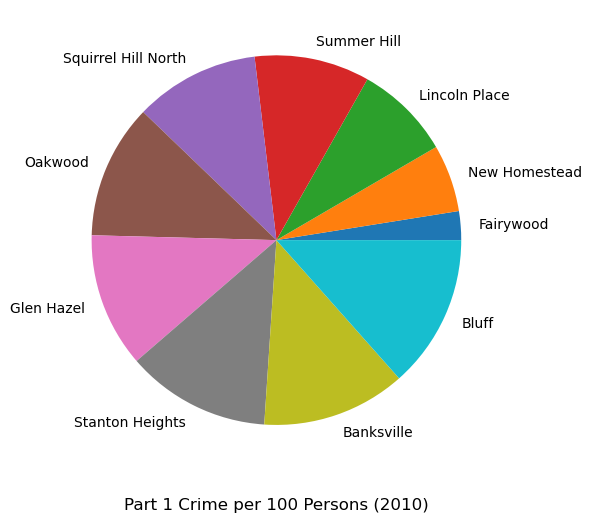

In [60]:
per_person_df = df.sort_values(by= "Part 1 Crime per 100 Persons (2010)", ascending = True)
per_person_df = per_person_df.head(10)
per_person_df.plot.pie(y = 'Part 1 Crime per 100 Persons (2010)', labels = per_person_df['Neighborhood'], figsize =(10, 6), legend = False)
plt.ylabel(" ")
plt.title('Part 1 Crime per 100 Persons (2010)', y = -0.1)

This new metric is major crime per 100 persons. This is a much better measure of crime, as it is proportional to neighborhood population. Looking at the pie chart, we can see the top ten lowest crime per 100 person neighborhoods, as well as the magnitude of this metric in comparison to each other.

# Dataset 3 - Built Environment Conditions #

In [63]:
# Loading CSV file
df = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/61a264ec-a537-42de-91e3-5752d689103d/download/built-enviornment-conditions.csv")

# Dropping rows that do not have data for the specific sub-metrics I am looking at within this dataset
df = df.dropna(subset = ["% Good / Excellent Condition Buildings (2009)","% Poor / Derelict Condition Buildings (2009)", "% of all Bldgs. Condemned (2010)"])

# Removing "%" from data values, converting from String to float, and dividing percentage by 100 to get a number between 0 and 1
normalized_excellent = df["% Good / Excellent Condition Buildings (2009)"].replace("%", "", regex = True)
normalized_excellent = pd.to_numeric(normalized_excellent) / 100
normalized_excellent.index = df["Neighborhood"]
normalized_excellent.sort_values(ascending = False).head(10)

Neighborhood
North Shore                  0.800
Allegheny West               0.720
Central Northside            0.429
Central Business District    0.320
Crawford-Roberts             0.276
Westwood                     0.227
Bluff                        0.222
Manchester                   0.216
East Liberty                 0.212
East Allegheny               0.209
Name: % Good / Excellent Condition Buildings (2009), dtype: float64

This is the first submetric of built environment conditions that we used - the proportion of buildings in good or excellent condition in each neighborhood. These are the top ten neighborhoods according to these scores, which are essentially just the proportion of how many good/excellent buildings there are.

In [65]:
# Normalizing the data for buildings in poor condition
# Same logic as above, except the value is subtracted from 1 since higher scores are given to neighborhoods with low proportions of derelict buildings
normalized_derelict = df["% Poor / Derelict Condition Buildings (2009)"].replace("%", "", regex = True)
normalized_derelict = pd.to_numeric(normalized_derelict) / 100
normalized_derelict = 1 - normalized_derelict
normalized_derelict.index = df["Neighborhood"]
normalized_derelict.sort_values(ascending = False).head(10)

Neighborhood
Regent Square          1.000
Squirrel Hill North    1.000
Ridgemont              1.000
Squirrel Hill South    0.999
Swisshelm Park         0.999
Banksville             0.998
Lincoln Place          0.998
Bon Air                0.998
Brookline              0.998
East Carnegie          0.997
Name: % Poor / Derelict Condition Buildings (2009), dtype: float64

This is our second submetric - the proportion of buildings in poor condition. These are the top ten neighborhoods according to these scores, which are one minus the proportion of buildings in poor condition.

In [67]:
# Normalizing the data for condemned buildings
# Uses same logic as the normalization for buildings in poor condition
normalized_condemned = df["% of all Bldgs. Condemned (2010)"].replace("%", "", regex = True)
normalized_condemned = pd.to_numeric(normalized_condemned) / 100
normalized_condemned = 1 - normalized_condemned
normalized_condemned.index = df["Neighborhood"]
normalized_condemned.sort_values(ascending = False).head(10)

Neighborhood
Squirrel Hill North    1.0
New Homestead          1.0
Highland Park          1.0
North Shore            1.0
Friendship             1.0
Point Breeze           1.0
Regent Square          1.0
Bon Air                1.0
Ridgemont              1.0
Shadyside              1.0
Name: % of all Bldgs. Condemned (2010), dtype: float64

This is our final submetric - the proportion of condemned buildings, which are essentially just buildings that are declared unsafe to be in. Listed above are the top ten neighborhoods according to these scores, which (like the submetric above), is just one minus the proportion of these types of buildings.

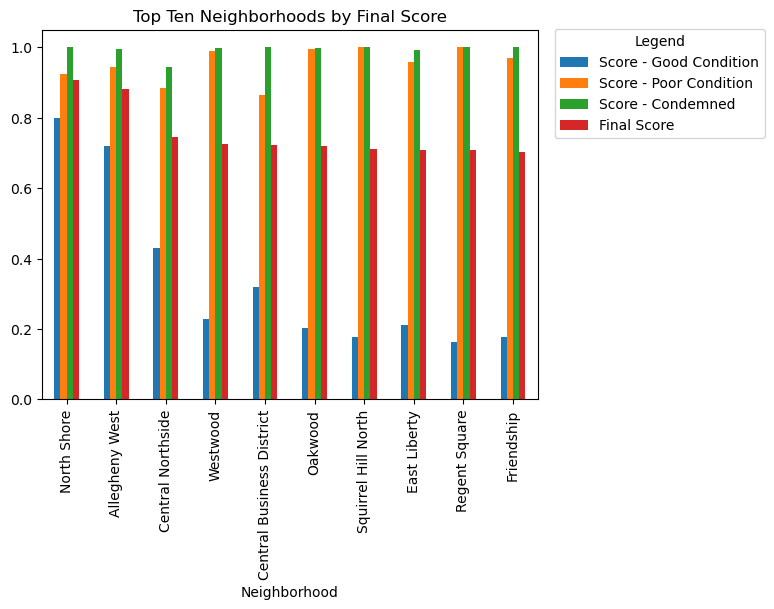

In [69]:
# New data frame created with 3 columns, each corresponding to the normalized scores created above
analysis_df = pd.DataFrame({"Score - Good Condition" : normalized_excellent, "Score - Poor Condition" : normalized_derelict, "Score - Condemned": normalized_condemned}, index = df["Neighborhood"]) 

# New column added to the analysis dataframe, which is the weighted average of the previous 3 columns
# Order of importance for the weightings (from most to least) - condemned buildings, poor conditions buildings, good condition buildings
analysis_df["Final Score"] = (analysis_df["Score - Good Condition"] * 0.35 + analysis_df["Score - Poor Condition"] * 0.3 + analysis_df["Score - Condemned"] * 0.35)

# Sort the rows by the "Final Score" column in descending order
sorted_df = analysis_df.sort_values(by = ["Final Score"], ascending = False)

# Create a new data frame of just the top ten rows
data_to_plot = sorted_df.head(10)

# Plotting data in a bar graph, giving it a title, and moving the legend to a suitable position outside of the graph
data_to_plot.plot(kind = "bar")
plt.title("Top Ten Neighborhoods by Final Score")
plt.legend(title = "Legend", bbox_to_anchor = (1.02,1.02))

Using a weighted average of each of the three submetrics, each neighborhood is given an overall score.

* 35% weighting - buildings in good condition
* 30% weighting - buildings in poor condition
* 35% weighting - condemned buildings

The graph above shows the neighbhorhoods with the top ten scores, as well as how they rank according to each submetric.

(0.0, 1.0)

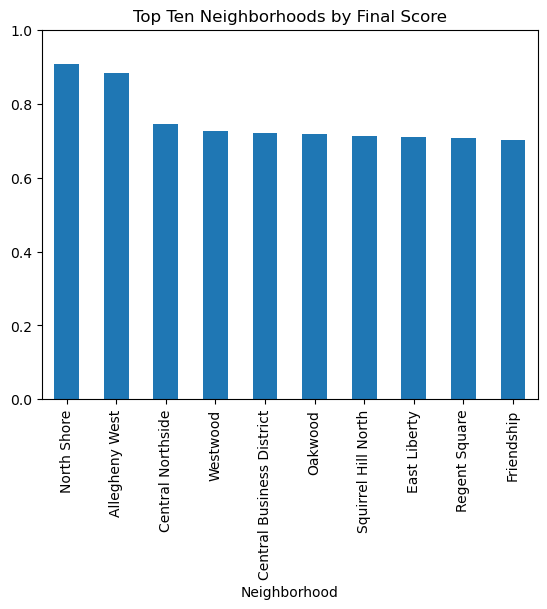

In [71]:
# Plotting only the "Final Score" column 
data_to_plot["Final Score"].plot(kind = "bar")
plt.title("Top Ten Neighborhoods by Final Score")
# Adjusting the y axis so that the upper boundary is 1.0 instead of based on the max score
plt.ylim(top = 1)

For a cleaner display, here is a graph showing only the final scores of each of the top ten neighborhoods.

# Conclusion #

After taking into account each of our top ten lists, only Squirrel Hill North was on every list. Thus, we determined that Squirrel Hill North is the best neighborhood in Pittsburgh. After analyzing our data, this neighborhood was deemed best because it ranked first in education, fifth in public safety, and seventh in building conditions. Although other neighborhoods outperformed Squirrel Hill North in certain categories, Squirrel Hill North displayed the best overall balance regarding our original metrics. Since our original plan to determine the best neighborhood valued a "lack of bad" more strongly than "excess good", we were happy with our decision. As was the goal with our predetermined standard of analysis, we found the neighborhood that offered opportunities and higher income (education dataset), had a low occurrence of major crime (public safety dataset), and had buildings in an overall good condition (built environment conditions dataset). Even if Squirrel Hill North was not the strongest in certain categories, the combination of these three metrics prove that it is a suitable neighborhood that is balanced in all aspects that residents desire.

The data driven determination set a predetermined measure for what the best neighborhood would be, which would be the neighborhood highest on all of the top ten lists. However, the neighborhoods that were personal favorites tended to be ones that were number 1 or 2 on a single list, but did not appear on others. For example, Fairywood ranked lowest in both overall major crime reports and major crime reports per 100 people, making it a personal favorite in the public safety category. However, Fairywood did not appear in the top ten list of either dataset 1 or 3. Since datasets 1 and 3 were somewhat of a proxy for measuring overall safety in a neighborhood, it seems that Fairywood should still get the merit of being the safest neighborhood, since it ranked lowest on crime statistics (even if it didn't have the highest education or best building conditions to help this metric).
So, personal favorite neighborhoods were those that outperformed strongly in a single category, while our end decision was based only on a predetermined standard.


* **Nick - personal favorite neighborhood:** I have only been to around 4-5 neighborhoods in Pittsburgh, but from this, I would say that my favorite neighborhood is Squirrel Hill. When I think about what determines my favorite neighborhood, I would say that nature/parks, cleanliness, and a diverse range of restaurants are some of the factors I think about. Since I am looking at these neighborhoods with a perspective of what is best to visit rather than what is best to live in, I do not consider factors like safety or education as strongly. However, in the case that I would be looking for a best neighborhood to live in, I believe that the metrics we used as a group are good indicators of this. So, my favorite neighborhood is determined more so by where I like to visit, while our group ranking of the best neighborhood is determined by factors that someone looking for a neighborhood to move to would consider.
